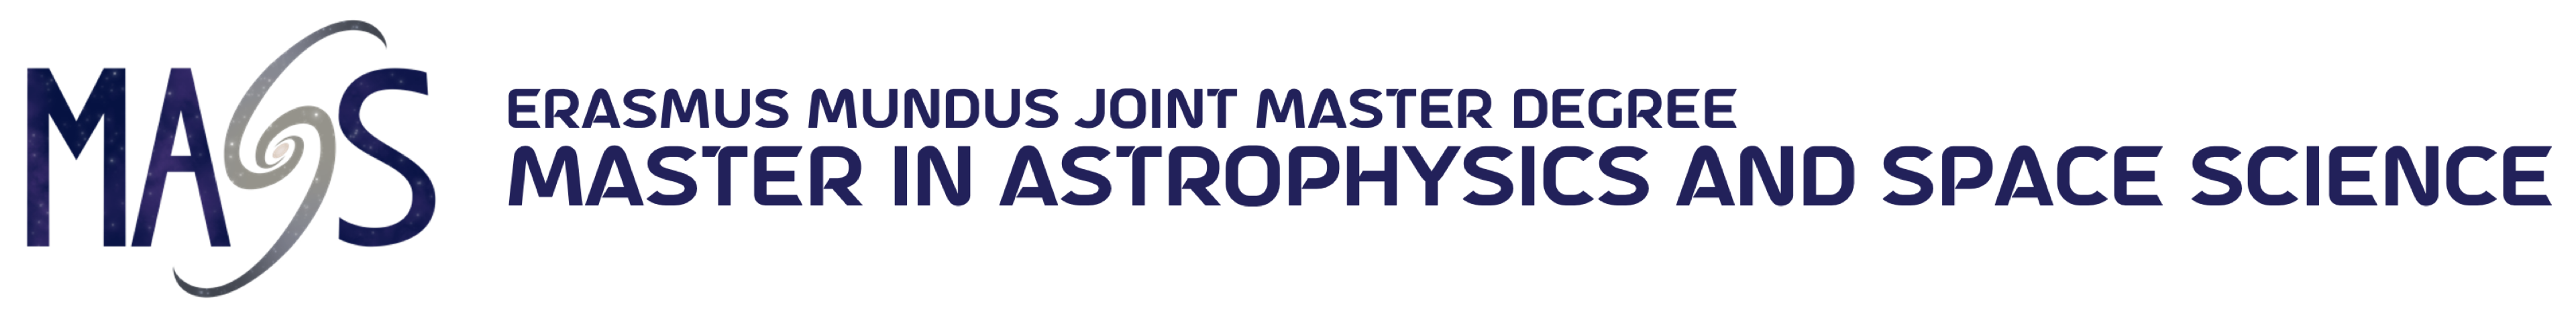

<center> <h2> Introduction to Active Galactic Nuclei </h2> </center>

<center> <h1> Python Crash Course: Astroquery </h1> </center>

<center> <h3>April 2024.</h3> </center>

#### Nataša Pavlov
##### natasa_pavlov@matf.bg.ac.rs

As we are already familiar with different packages, such as ```numpy```, ```matplotlib```, ```pandas``` i ```astropy```, we will go over two other which may prove very useful: ```speclite``` & ```astroquery```. In the references section you will find the link tothe documentations of both.

In [5]:
import numpy as np
import pandas as pd
import astropy.coordinates as coords
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib import rcParams # for setting plot parameters in advance

# filters for different databases
from speclite import filters

#astroquery - for query search many data archives directly from Jupyter notebook
from astroquery.sdss import SDSS
from astroquery.gaia import Gaia

%matplotlib inline

## SDSS (& Gaia) filters

Different databases have different filters and, consquently, photometric magnitudes are dependant on their properties. For example, we will show both SDSS **u**, **g**, **r**, **i**, **z**, and GAIA **BR**, **G** i **RP** filters.

For this purpose, we will use ```speclite``` and its class ```filters```. When we talk about filters, we typically mean _filter response curves_  which are defined as the transmition coefficient with respect to the wavelenght.

Firstly, let's see which filter from specific obsevations are available:

In [6]:
filters.filter_group_names

['sdss2010',
 'sdss2010noatm',
 'decam2014',
 'wise2010',
 'hsc2017',
 'lsst2016',
 'bessell',
 'BASS',
 'MzLS',
 'Euclid',
 'decamDR1',
 'decamDR1noatm',
 'gaiadr2',
 'gaiadr3',
 'twomass',
 'galex',
 'odin',
 'suprime',
 'cfht_megacam']

At this point, we will choose SDSS. Let's see the names of its filters (we already know what to expect):

In [7]:
filters.load_filters('sdss2010-*').names

['sdss2010-u', 'sdss2010-g', 'sdss2010-r', 'sdss2010-i', 'sdss2010-z']

It's time to finally see the response curves!

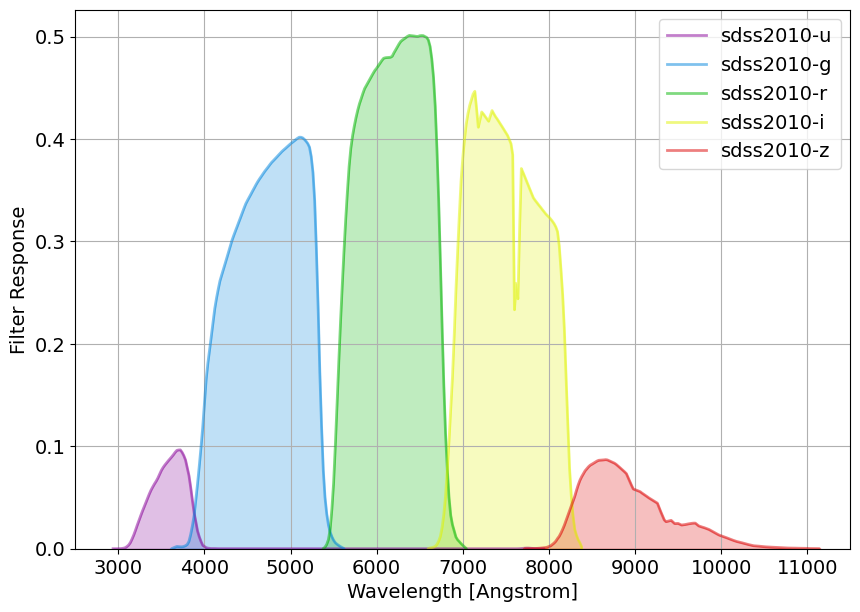

In [8]:
#parameters for plotting (by hand, but they could also be defined in the beginning for the whole notebook)
rcParams['figure.figsize'] = 10, 7
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14

sdss = filters.load_filters('sdss2010-*')
filters.plot_filters(sdss, wavelength_limits=(2500, 11500))

Now, let's see the GAIA filters:

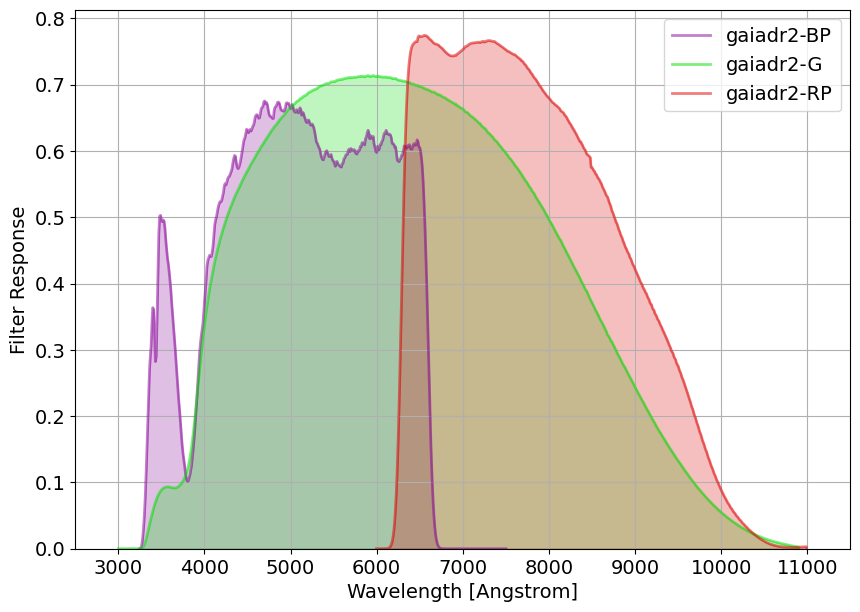

In [9]:
#parameters for plotting (by hand, but they could also be defined in the beginning for the whole notebook)
rcParams['figure.figsize'] = 10, 7
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14

gaia = filters.load_filters('gaiadr2-*')
filters.plot_filters(gaia, wavelength_limits=(2500, 11500))

Without doubt, these filters are not the same meaning we have to pay close attention when dealing with magnitudes from different databases. For comparison, we will now plot both on the same graph:

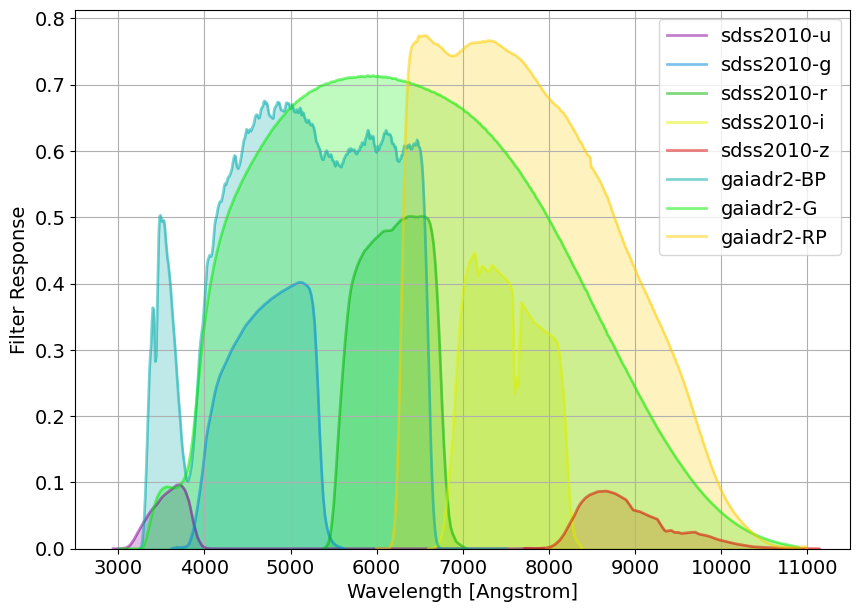

In [10]:
#parameters for plotting (by hand, but they could also be defined in the beginning for the whole notebook)
rcParams['figure.figsize'] = 10, 7
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14

both = filters.load_filters('sdss2010-*','gaiadr2-*')
filters.plot_filters(both, wavelength_limits=(2500, 11500))

<hr><hr><hr><hr><hr>

## Astroquery

One way of obtaining data from the SDSS is by going to their web page, entering the SQL query, downloading the data by hand and loading them in the notebook from a file. This seems a bit tedious after a double-digit number of times.

This is why we will show an example of how to obtain the data directly from the notebook using ```astroquery```. The example will be a HR diagram for the globular cluster NGC 7098. Below in the table are some information about the cluster which will be useful for our search.

For this purpose, we want to do a cone search centered in the centre of the cluster (the coordinates in the table) and find all the stars within a certain radius (central radius in the table). A basic example of a cone search is given <a href="https://skyserver.sdss.org/dr18/SearchTools/sql#">here</a> (in Basic search, Basic position search).

Let's take a minute and explore the SQL given in the example:

```
-- Find galaxies within 1' of a given point (ra=185.0, dec=-0.5).
-- This is a slightly more complex query, but it can be easily adapted to search
-- around any point in the sky.
-- To see how to limit the search only to objects with clean photometry, see the
-- Clean imaging query.

SELECT G.objID, GN.distance
FROM Galaxy as G
JOIN dbo.fGetNearbyObjEq(185.,-0.5, 1) AS GN
ON G.objID = GN.objID
ORDER BY distance

```

Without getting into the other details of the query, we will just focus on the function which defines the patch of the sky we want: ```dbo.fGetNearbyObjEq(ra, dec, radius)```. It takes the arguments:
- right ascension and declination in degrees
- the radius in arminutes.

This is important to note, as we will usually be in a place where we have these quantities defined in various units. Let's see the example of our globular cluster now.

The data we will need for our HR diagram are magnitudes **g** and **r**: the temperature is correlated with the color index, so on the x-axis we will plot **g-r** and magnitude **r** on the y-axis.

| name    | rah | ram | ras | decd | decm | central_radius |
|---------|-----|-----|-----|------|------|----------------|
| NGC7089 | 21  | 33  | 27  | 0    | 49.4 | 0.14           |

The right ascenesion is given in hours, minutes and seconds;
The declination is given in degrees and minutes;
The central radius is given in degrees.

We will have to translate coordinates accordingly because of the defined units in the function for the SQL search:

In [11]:
# conversion of ra and dec into degrees and the radius in arcmin

pr_ra = round((21+33/60+27/3600)*15, 2) #deg
pr_dec = round(-49.4/60, 2) #deg
pr_radius = round(0.14*60, 2) #arcmin

print(pr_ra, pr_dec, pr_radius)

323.36 -0.82 8.4


Having already studied the SQL queries, how to we make contact with the database? It's actually quite simple (this is, in essence, the point):

1. we define a string in a specific format:

        
        sql_string = f"SELECT [...]\
                       FROM   [...]\
                       WHERE  [...]"
        
   
2. We send a request to the SDSS database and save the result in the variable ```res``` with the following line:
   
       res = SDSS.query_sql(sql_string)

         
3. Optionally, we transform our result into a ```pandas``` dataframe:

       SDSStable = res.to_pandas()


Let's see the example!



A useful link:
- SDSS: http://skyserver.sdss.org/dr10/en/help/docs/realquery.aspx

## Example: SDSS (Globular cluster NGC7089)

The query should be defined as:

```
sql = f"SELECT [...]\
        FROM   [...]\
        WHERE  [...]"
```

Here, the query is defined as a function with additional parameters: coordinates and radius (in order to search for variuos differen globular clusters each time), which we defined above for this specific case:

In [12]:
def sql_SDSS_all(ra, dec, radius):

    sql = f"""SELECT p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z
    FROM
    photoObj p, dbo.fGetNearbyObjEq({ra}, {dec}, {radius}) n
    WHERE
    p.objID = n.objID
    and p.type = 6"""

    return sql

In [13]:
print(sql_SDSS_all(pr_ra, pr_dec, pr_radius))

SELECT p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z
    FROM
    photoObj p, dbo.fGetNearbyObjEq(323.36, -0.82, 8.4) n
    WHERE
    p.objID = n.objID
    and p.type = 6


In [14]:
sql_SDSS = sql_SDSS_all(pr_ra, pr_dec, pr_radius)
SDSStable = SDSS.query_sql(sql_SDSS).to_pandas()

In [15]:
SDSStable

,objid,ra,dec,u,g,r,i,z
0,1237649940446576959,323.288514,-0.830807,17.19306,15.05346,14.14250,13.79085,13.56266
1,1237649940446576963,323.311728,-0.835650,17.19598,15.30005,14.46050,14.11070,13.92155
2,1237649940446576969,323.287581,-0.821306,17.61315,16.02216,15.28496,15.00616,14.80030
3,1237649940446576971,323.289378,-0.831852,17.37813,16.14035,15.70194,15.50832,15.41789
4,1237649940446576980,323.310713,-0.836654,18.34532,16.87518,16.17002,15.93285,15.75932
...,...,...,...,...,...,...,...,...
2343,1237679028109116849,323.374084,-0.955079,22.23549,22.59805,21.75581,21.18097,20.62297
2344,1237679028109116850,323.377153,-0.943868,22.77380,23.01994,21.67588,21.61789,21.44203
2345,1237679028109116851,323.379183,-0.943703,23.38696,23.46049,21.79856,20.81739,20.38616
2346,1237679028109116852,323.380195,-0.928427,23.97792,22.54676,21.33505,20.95838,20.76163


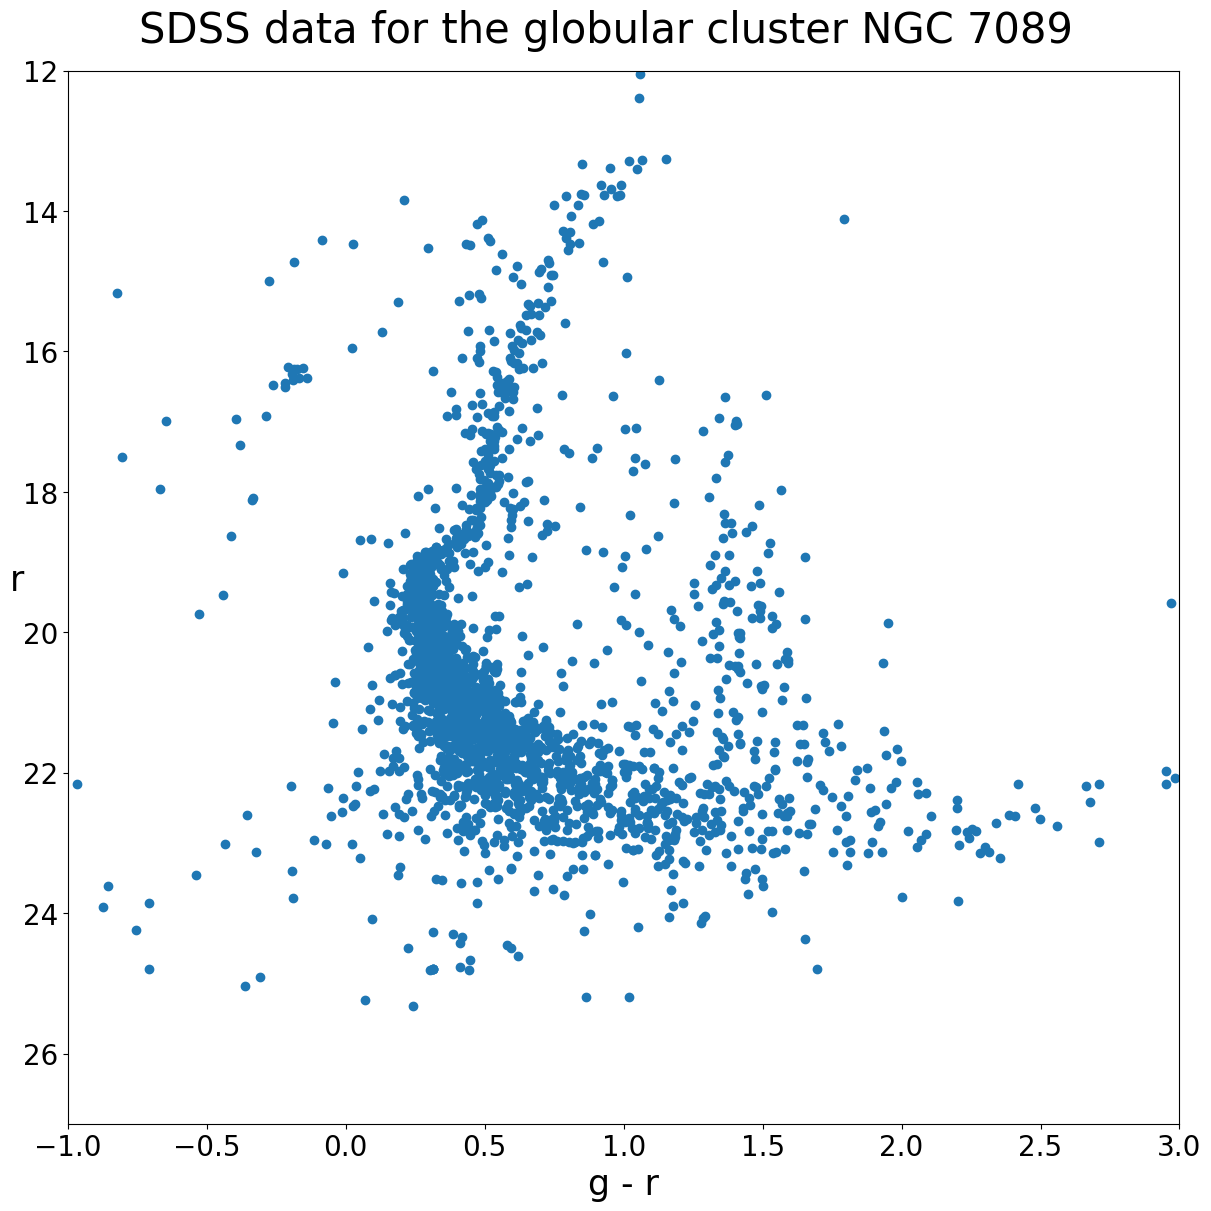

In [16]:
fig = plt.figure(figsize=(12, 12), layout='constrained')
fig.suptitle(f'SDSS data for the globular cluster NGC 7089', fontsize=30)

ax2 = fig.add_subplot(111)
ax2.set_xlim(-1, 3)
ax2.set_ylim(12, 27)
ax2.invert_yaxis()
ax2.scatter(SDSStable['g'] - SDSStable['r'], SDSStable['r'])
ax2.set_xlabel('g - r',  fontsize=25)
ax2.set_ylabel('r',  fontsize=25, rotation=0)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)

plt.show()

<hr><hr><hr><hr>

## SDSS SQL Tutorial - some useful links

Tutorial on SQL: https://skyserver.sdss.org/dr16/en/help/howto/search/searchhowtohome.aspx

Sample Queries: http://skyserver.sdss.org/dr17/Support/realquery

Schema Browser: http://skyserver.sdss.org/dr17/MoreTools/browser

DIY: http://skyserver.sdss.org/dr17/SearchTools/sql

<hr><hr><hr><hr><hr>

## References:

- The Hertzsprung-Russell Diagram of a Globular Cluster http://community.dur.ac.uk/ian.smail/gcCm/gcCm_intro.html
- Documentation for ```speclite``` paket https://speclite.readthedocs.io/en/latest/index.html
- Documentation for ```astroquery``` paket https://astroquery.readthedocs.io/en/latest/

- HEASARC database, MWSC catalog https://heasarc.gsfc.nasa.gov/W3Browse/all/mwsc.html
- SDSS Data Release 17 https://www.sdss.org/dr17/
- SDSS Data Release 10 Sky Server http://skyserver.sdss.org/dr10/en/home.aspx
- SDSS Voyages http://voyages.sdss.org/